Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')  #

#посмотрим на данные с разных сторон 

In [2]:
stud.shape      #оценим габариты 

(395, 30)

In [3]:
stud.describe()   # и базовую описательную статистику для всех числовых столбцов

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [4]:
stud.info()    #ну конечно, сводная по всему данным
#только три парамера не имеют пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# отбор числовых колонок
stud_numeric = stud.select_dtypes(include=[np.number]) #pandas.core.frame.DataFrame numeric columns
numeric_cols = stud_numeric.columns.values #class 'numpy.ndarray'
#numeric_cols = stud.select_dtypes(include='number').columns # class 'pandas.core.indexes.base.Index'
#numeric_cols = stud_numeric.columns # class 'pandas.core.indexes.base.Index'
print(numeric_cols)
stud_numeric


['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures'
 'studytime, granular' 'famrel' 'freetime' 'goout' 'health' 'absences'
 'score']


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


In [6]:
# отбор нечисловых колонок
stud_non_numeric = stud.select_dtypes(exclude=[np.number])
non_numeric_cols = stud_non_numeric.columns
print(non_numeric_cols)
stud_non_numeric


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


<AxesSubplot:>

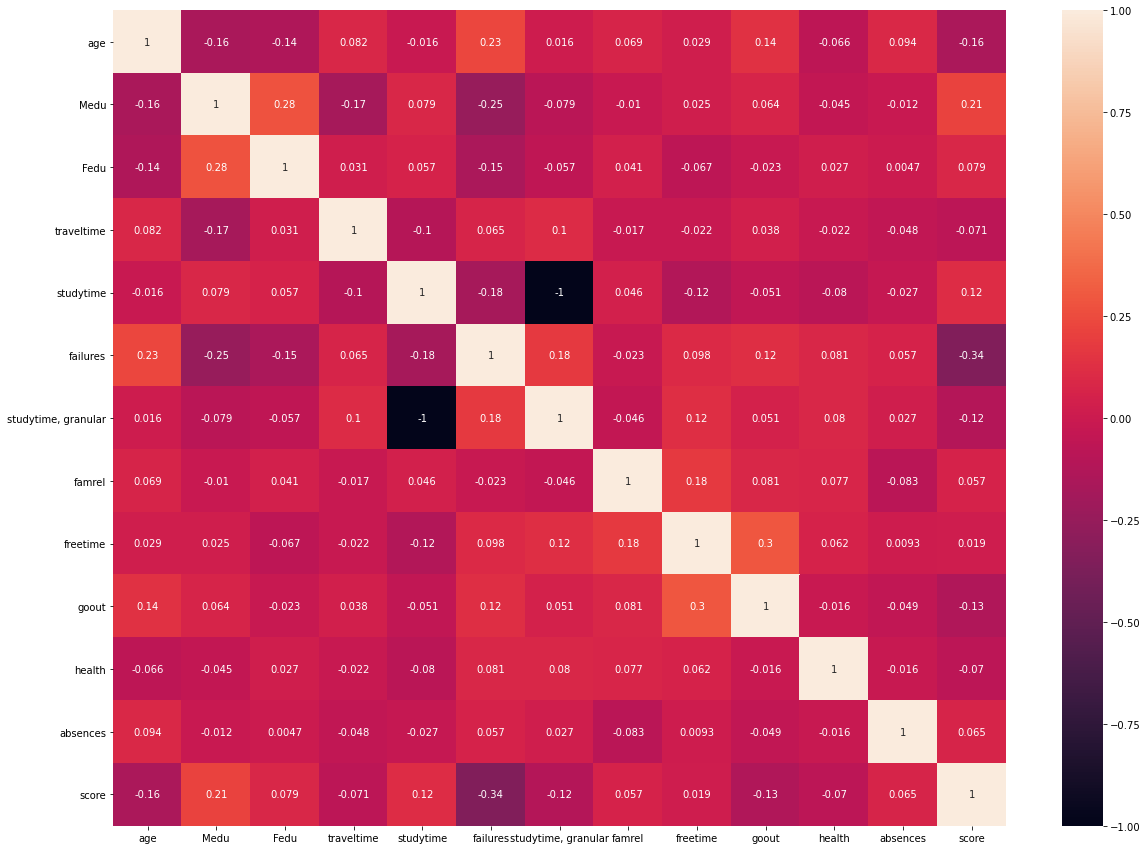

In [7]:
#как данные , пока необработанные коррелируют между собой ? может попадется что-то интересное
plt.subplots(figsize=(20,15))
sns.heatmap(stud.corr(),annot = True) #annot = True

4
4
[ -6.  -9.  -3.  nan -12.]
[ 2.  3.  1. nan  4.]


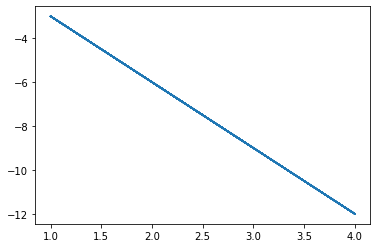

In [8]:
#интересный черный квадрат -1!
#если не принимать близко отрицатальный знак - то это вероятно 
# две переменные с одинаковым колличеством пропусков, вариантами значений и схожим именем , но различными величинами измерения
print(stud['studytime, granular'].nunique())
print(stud['studytime'].nunique())
print(stud['studytime, granular'].unique())
print(stud['studytime'].unique())
#проверим завосимость одной ввеличины от другой визуально
a = stud.studytime
b = stud['studytime, granular']
plt.plot(a,b)


ValueError: Could not interpret value `studytime, granular` for parameter `x`

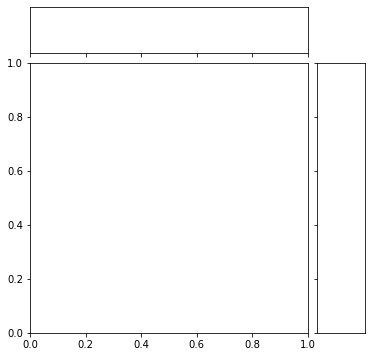

In [18]:
sns.jointplot(x='studytime, granular',
            y='studytime',
            #hue='sex',
            #kind='kde',
            data=stud);
#линейность зависимости приводит к мысли о том что один и тотже параметр, но в разных системах отсчета 
#избавимся от 'studytime, granular'
stud.drop(['studytime, granular'], inplace = True, axis = 1)


In [19]:
# изменилось число числовых колонок
stud_numeric = stud.select_dtypes(include=[np.number])
numeric_cols = stud_numeric.columns.values 
print(numeric_cols)
stud_numeric

['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'health' 'absences' 'score']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


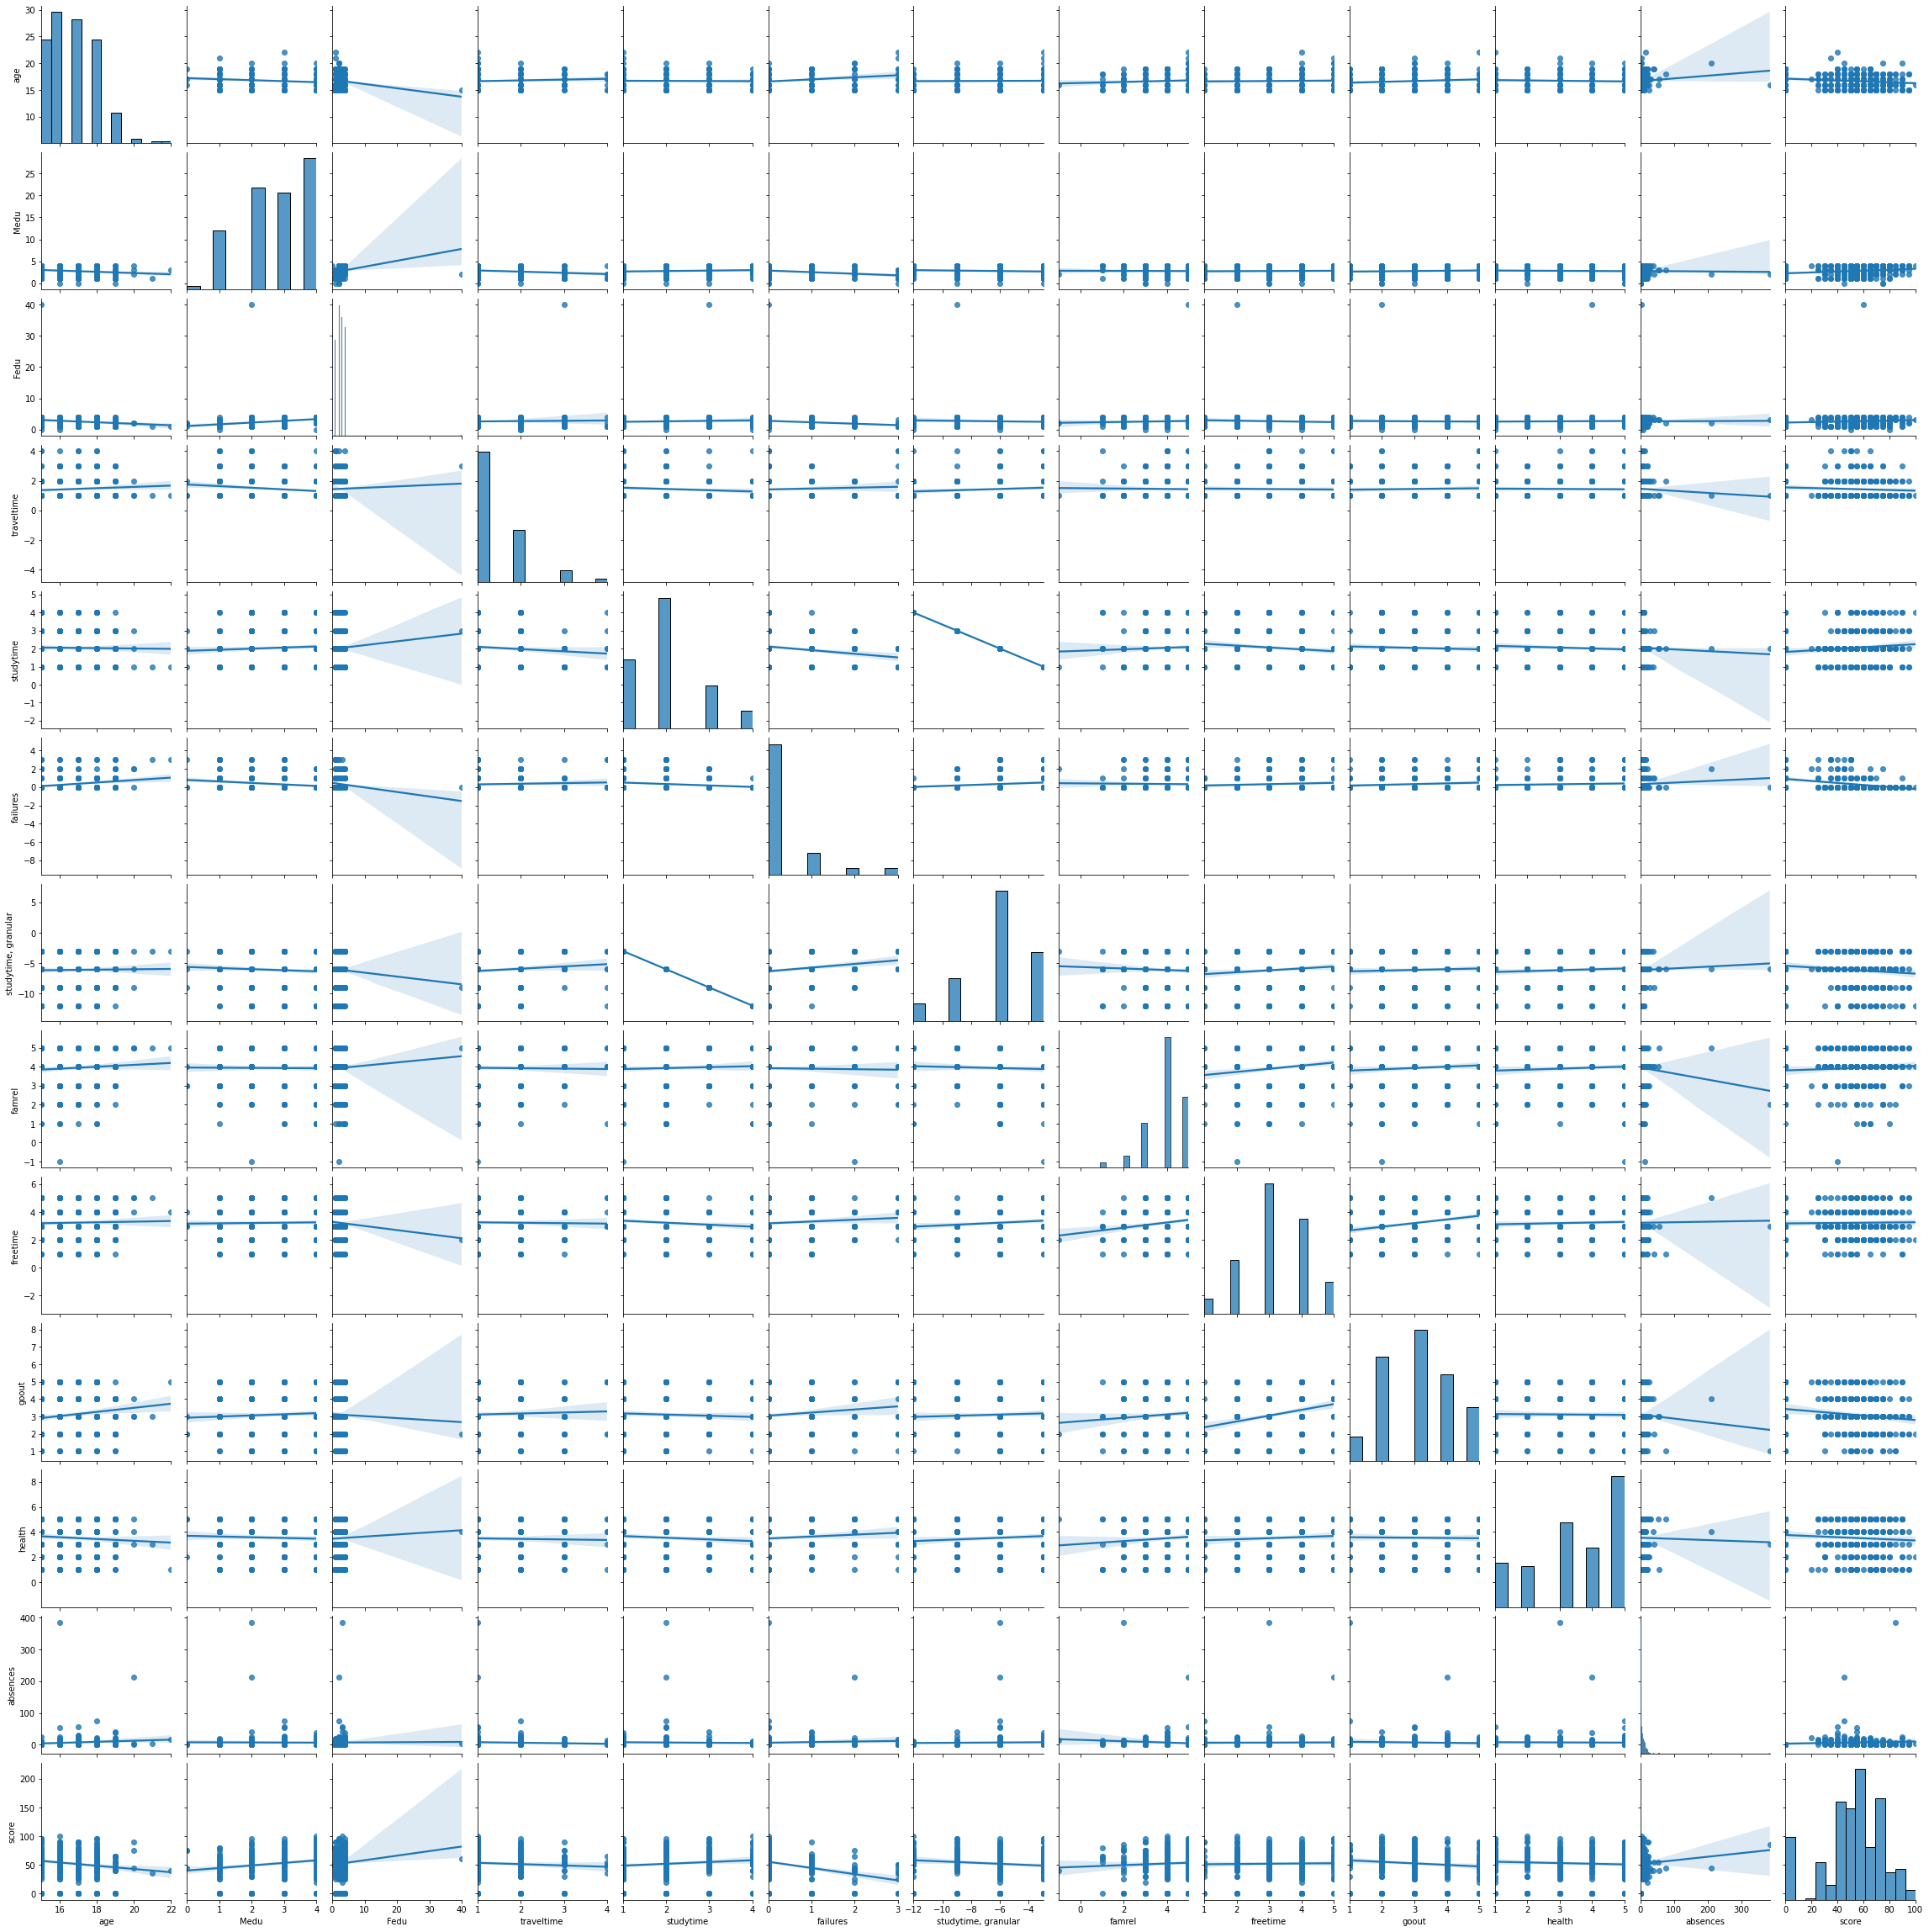

In [10]:
#Выясним, какие столбцы коррелируют с оценкой score 
#Это может поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

#Корреляции рассмотрим только для числовых столбцов.
sns.pairplot(stud_numeric, kind = 'reg')

# как то не то

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Column: age
More 10 repiting: 5 - [15, 16, 17, 18, 19]
Uniqums: 8 

Column: Medu
More 10 repiting: 4 - [1.0, 2.0, 3.0, 4.0]
Uniqums: 5 

Column: Fedu
More 10 repiting: 5 - [1.0, 2.0, 3.0, 4.0]
Uniqums: 6 

Column: traveltime
More 10 repiting: 4 - [1.0, 2.0, 3.0]
Uniqums: 4 

Column: studytime
More 10 repiting: 4 - [1.0, 2.0, 3.0, 4.0]
Uniqums: 4 

Column: failures
More 10 repiting: 5 - [0.0, 1.0, 2.0, 3.0]
Uniqums: 4 

Column: famrel
More 10 repiting: 5 - [2.0, 3.0, 4.0, 5.0]
Uniqums: 6 

Column: freetime
More 10 repiting: 6 - [1.0, 2.0, 3.0, 4.0, 5.0]
Uniqums: 5 

Column: goout
More 10 repiting: 5 - [1.0, 2.0, 3.0, 4.0, 5.0]
Uniqums: 5 

Column: health
More 10 repiting: 6 - [1.0, 2.0, 3.0, 4.0, 5.0]
Uniqums: 5 

Column: absences
More 10 repiting: 9 - [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
Uniqums: 36 

Column: score
More 10 repiting: 12 - [0.0, 30.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 90.0]
Uniqums: 18 



In [ ]:
#Очевидно, что для номинативных переменных использовать корреляционный анализ не получится.
#Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных.
#Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

#Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

#Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

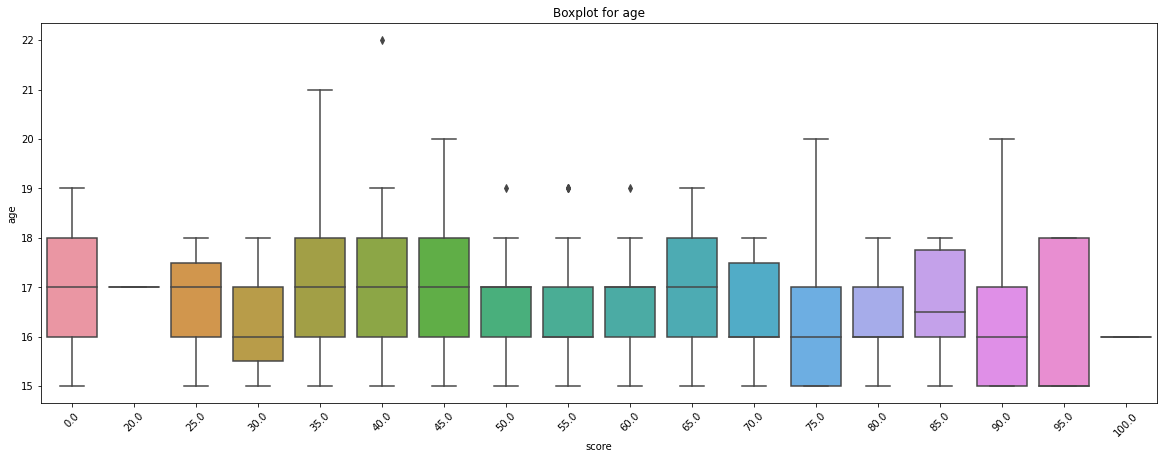

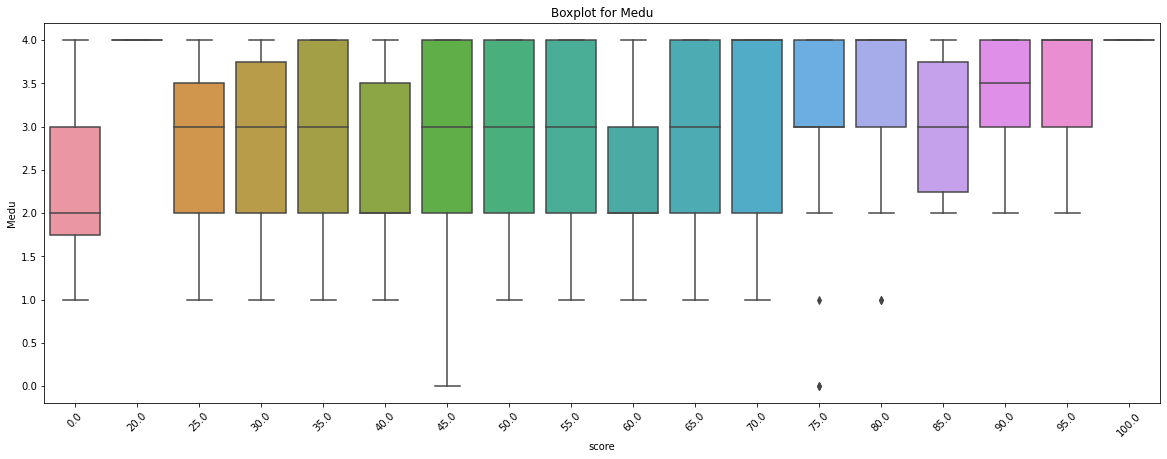

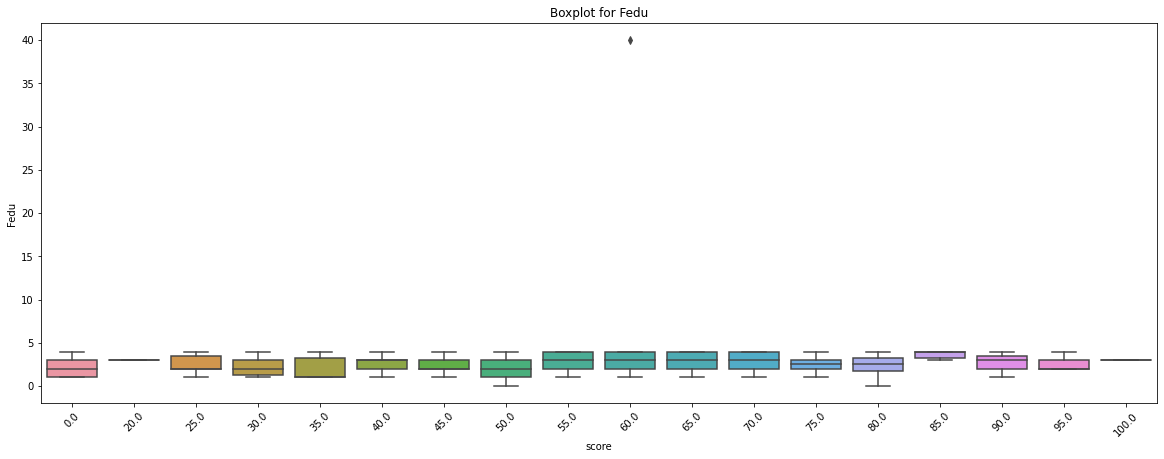

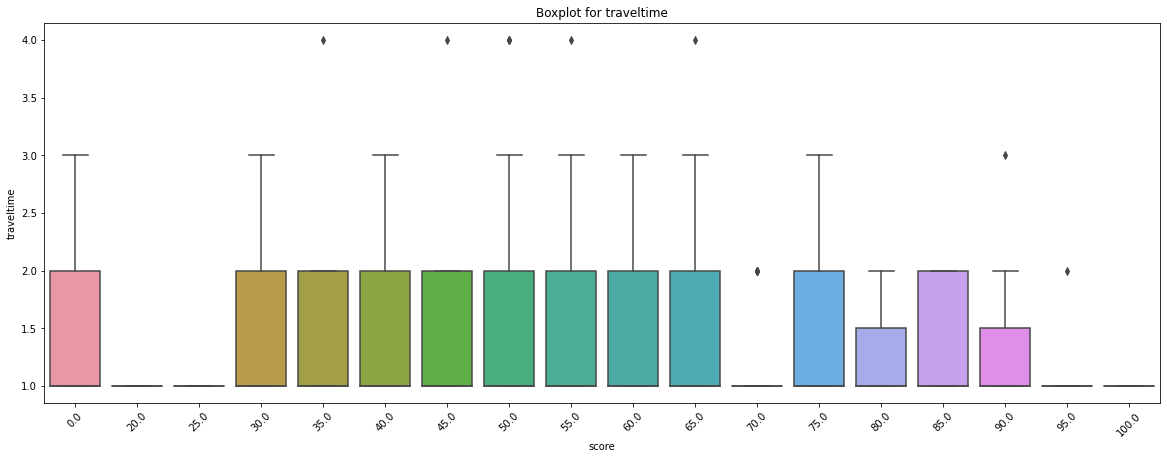

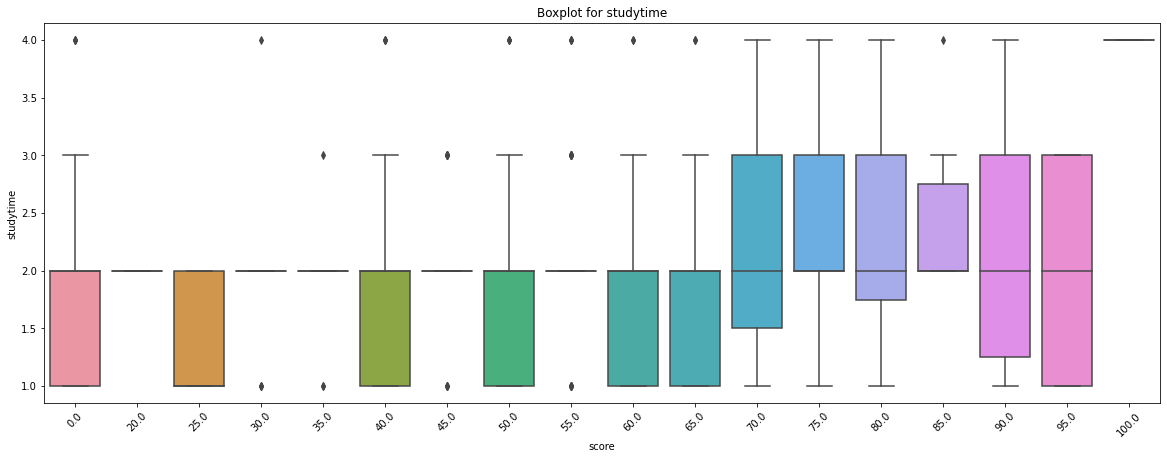

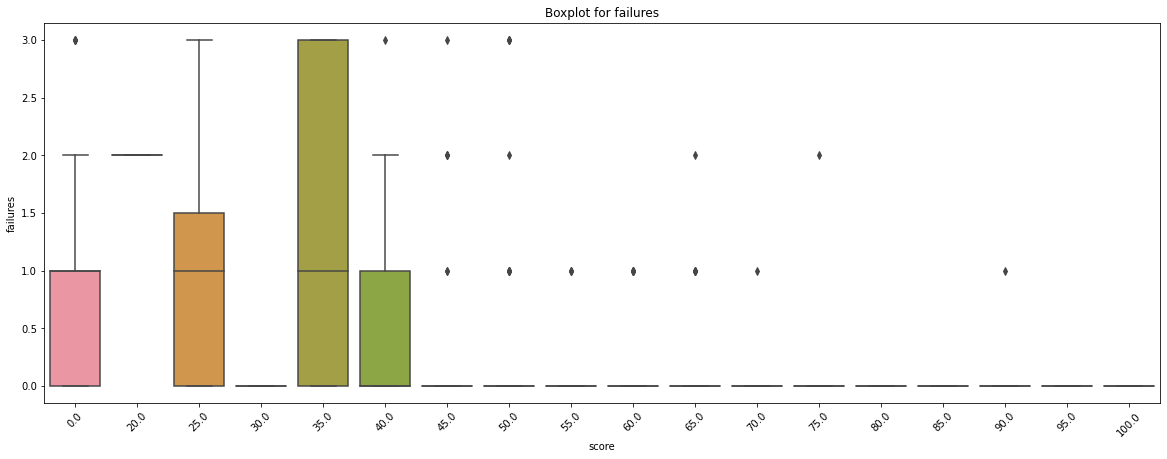

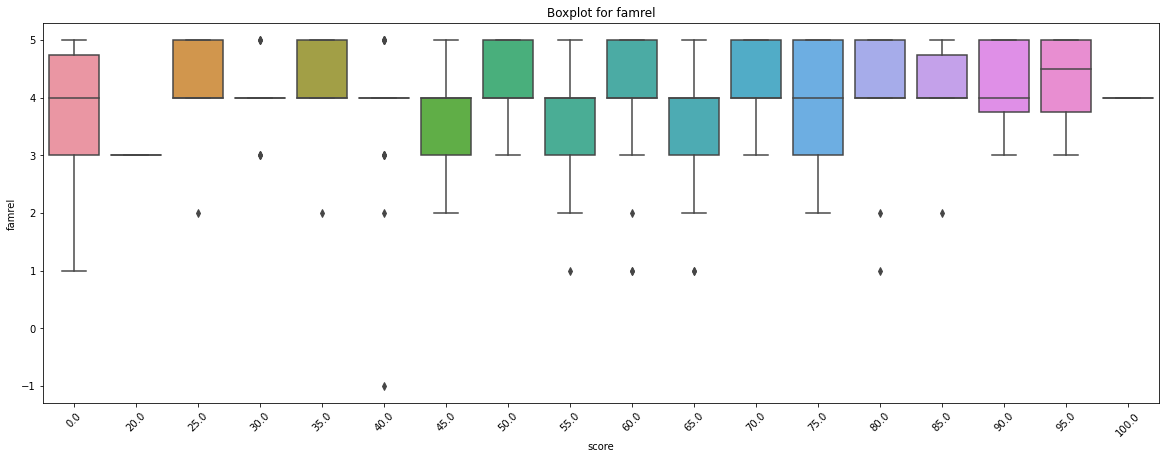

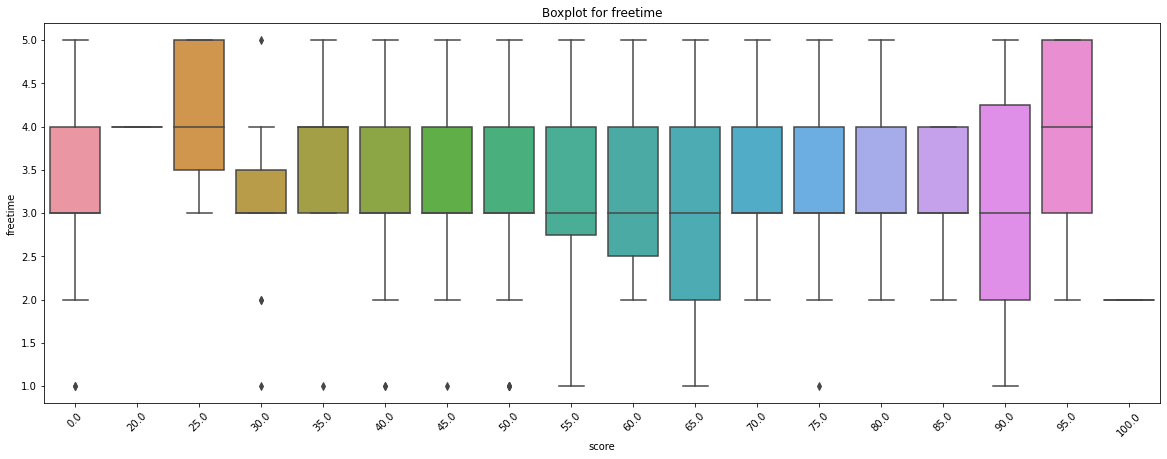

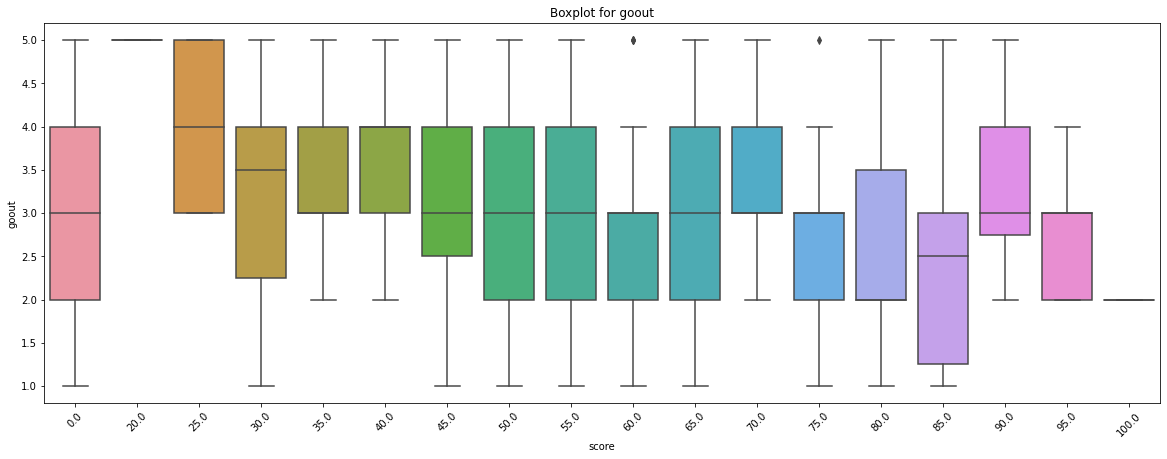

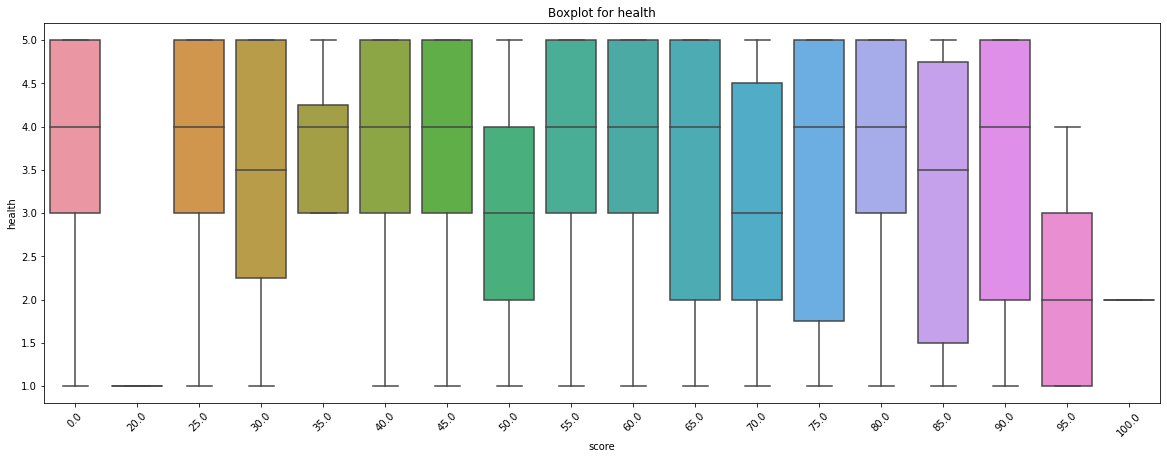

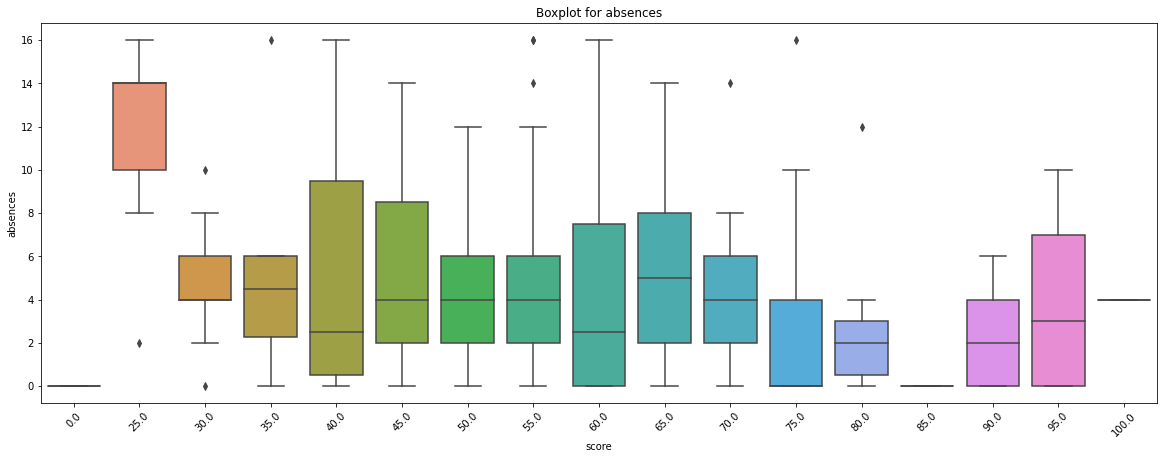

In [40]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (20, 7))
    sns.boxplot(y=column, x='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax) #, orient='h'
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

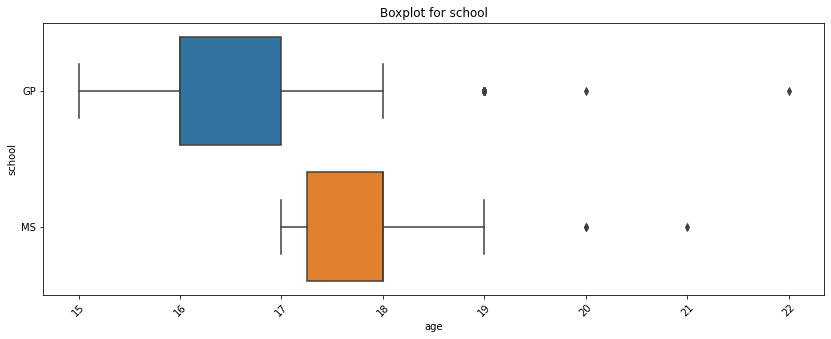

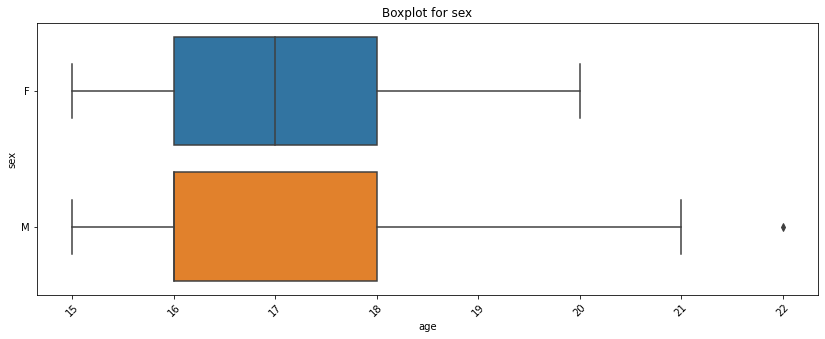

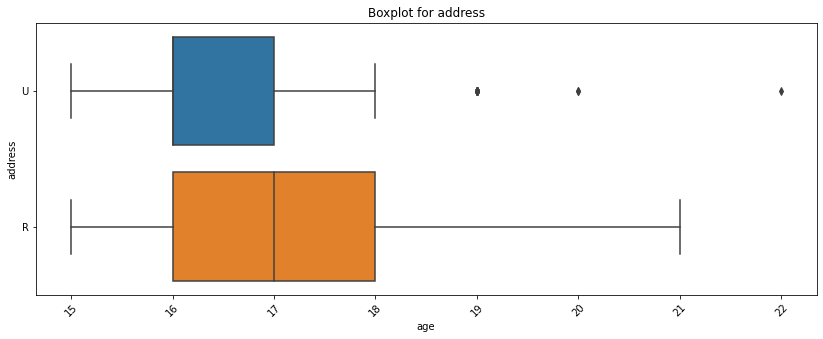

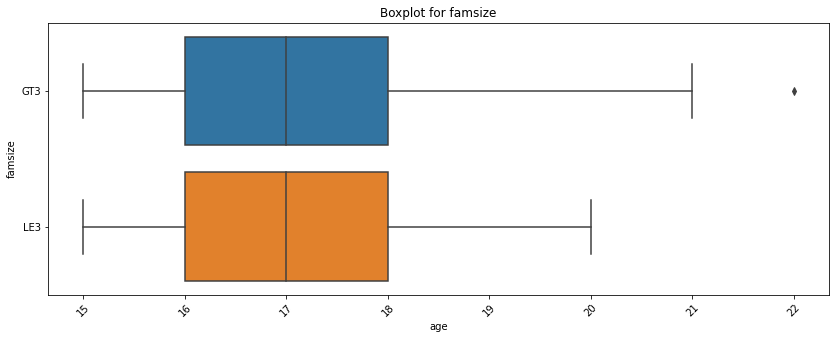

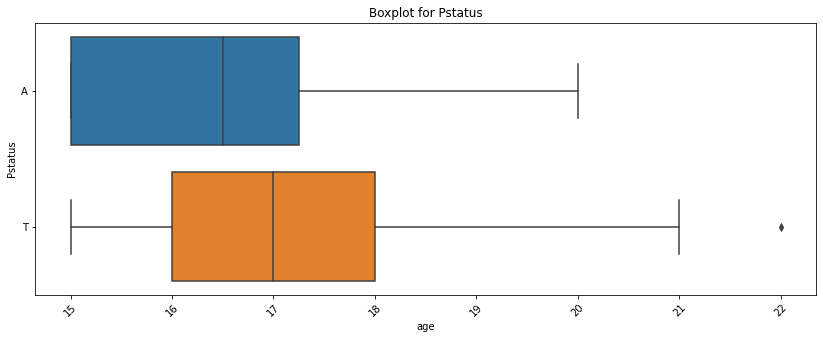

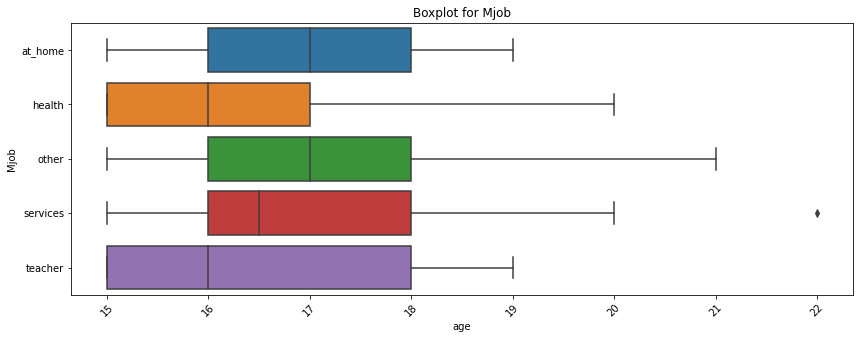

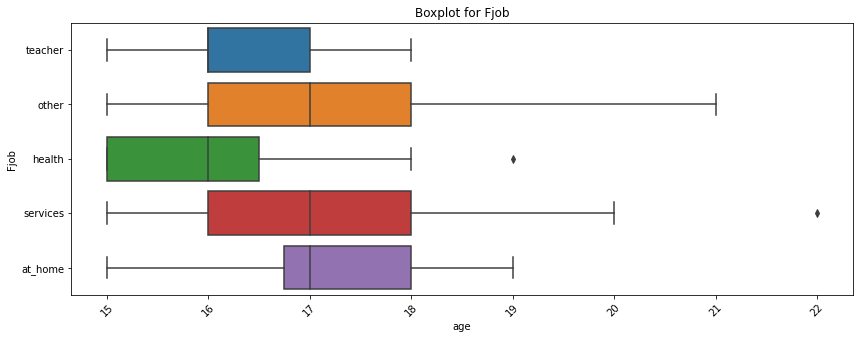

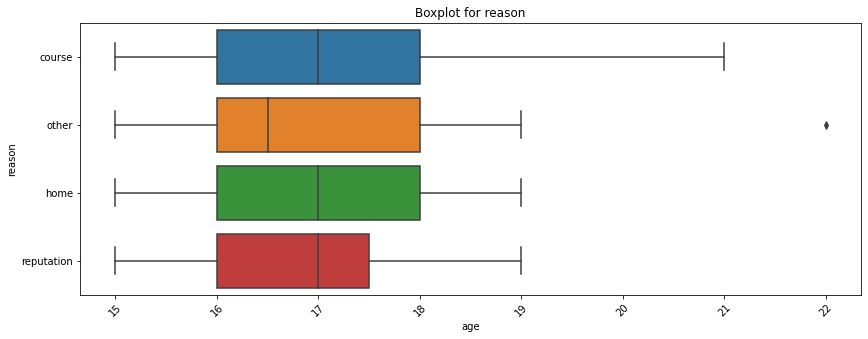

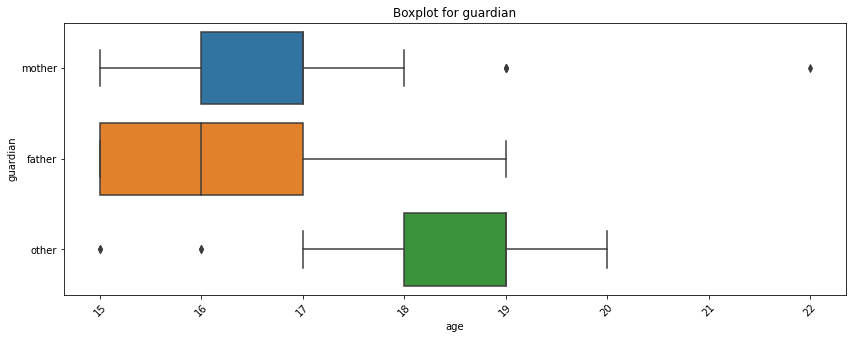

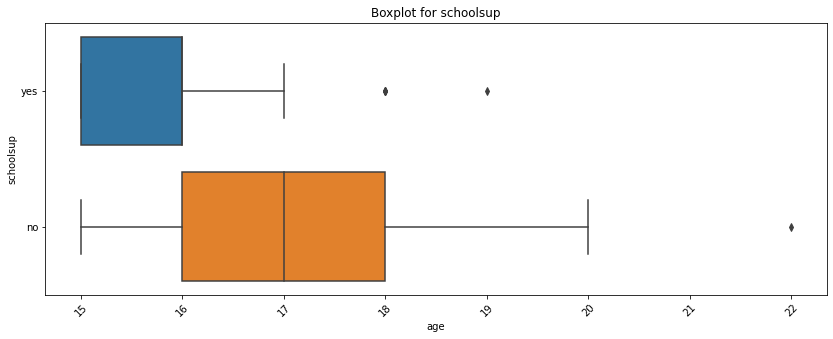

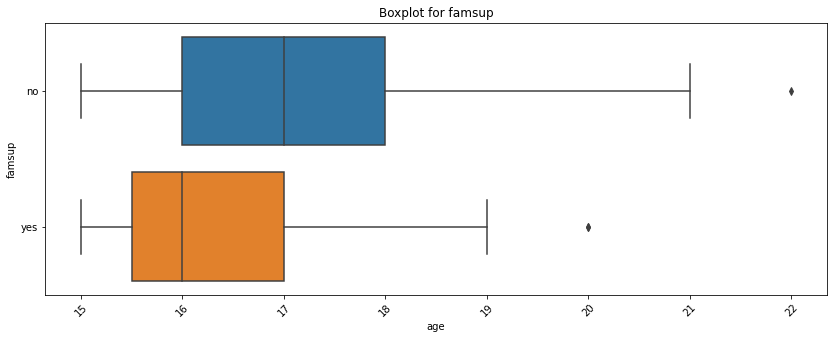

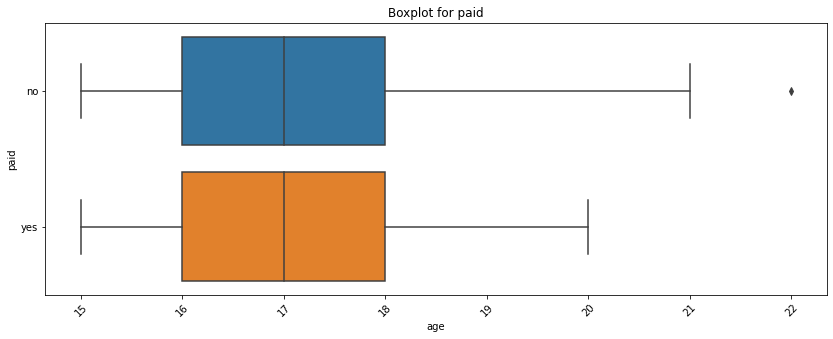

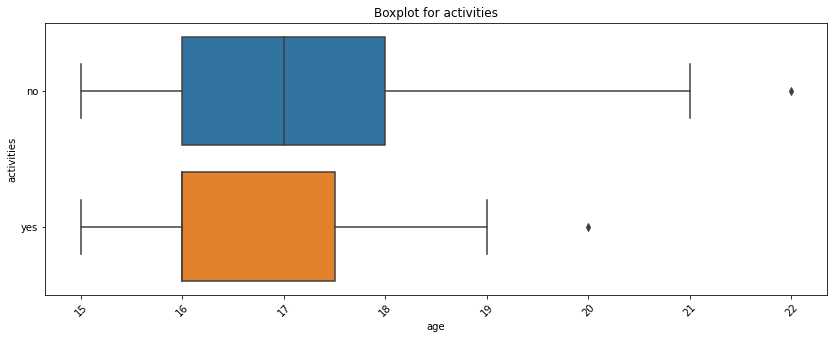

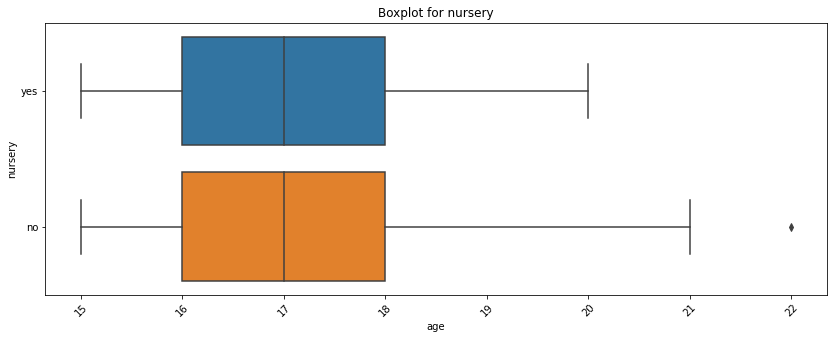

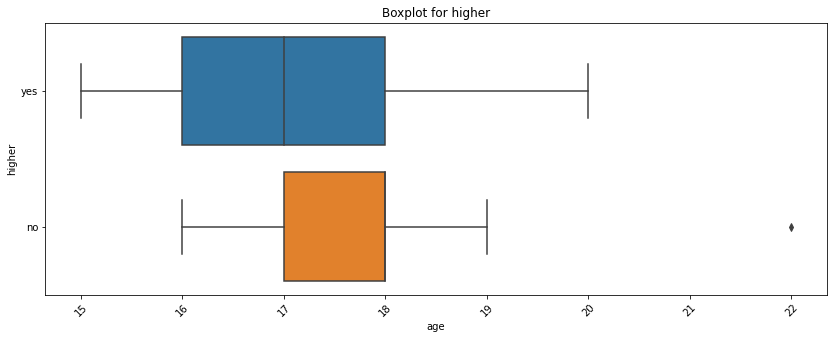

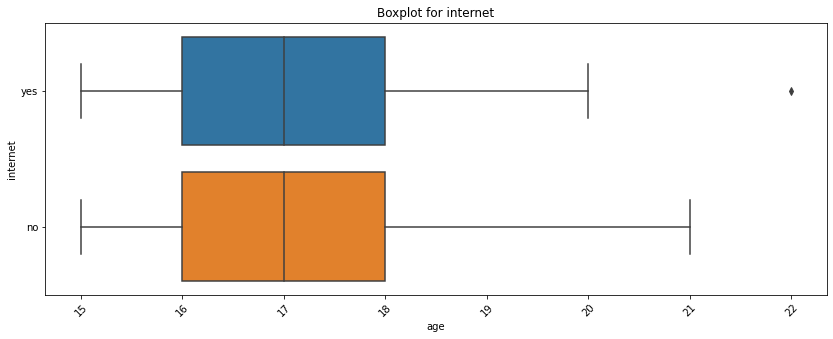

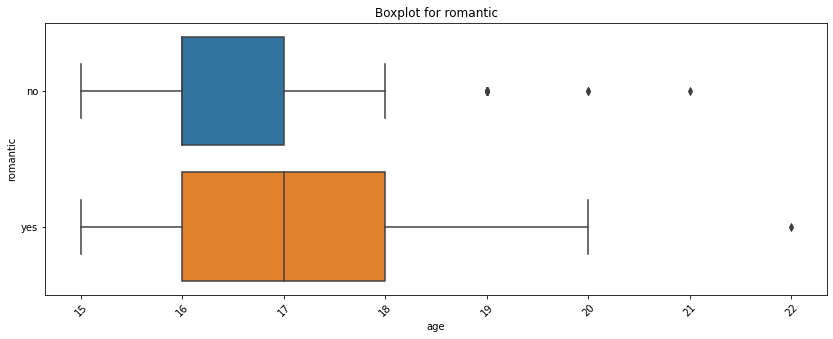

In [47]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 5))
    sns.boxplot(y=column, x='age',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:5])],
               ax=ax, orient='h')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

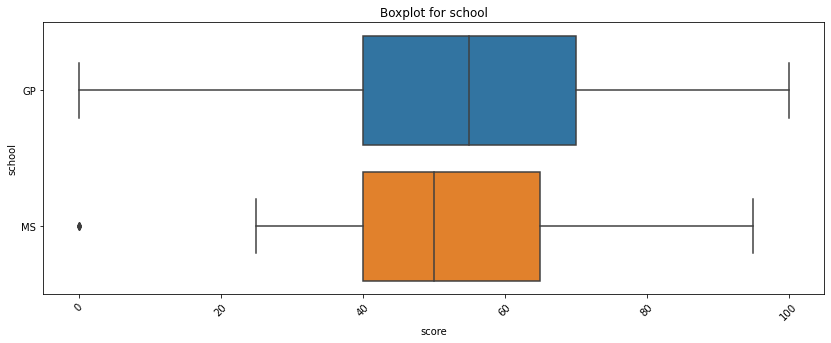

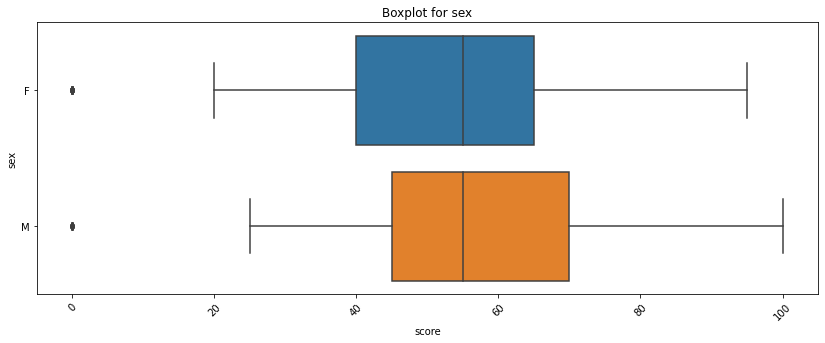

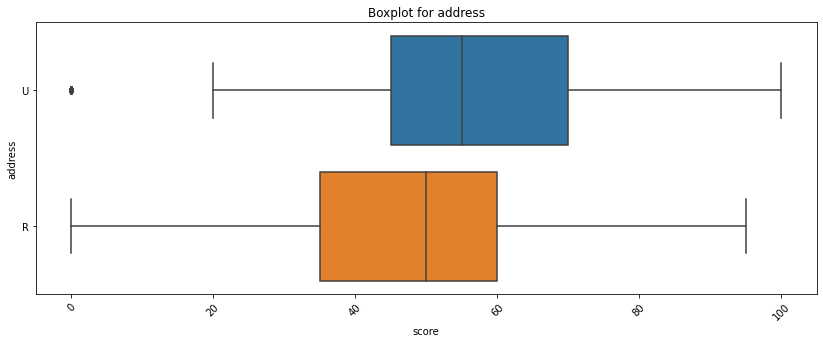

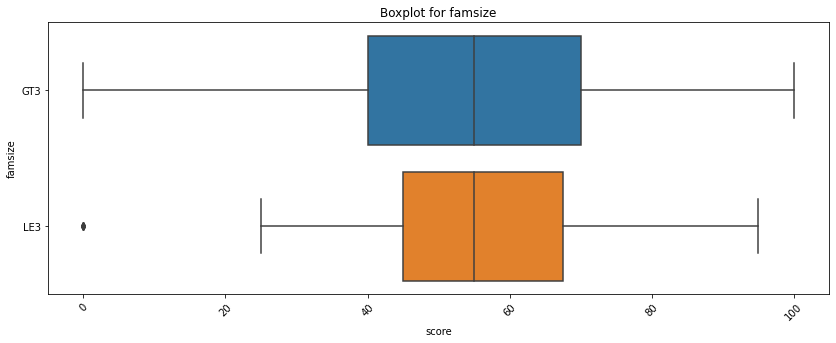

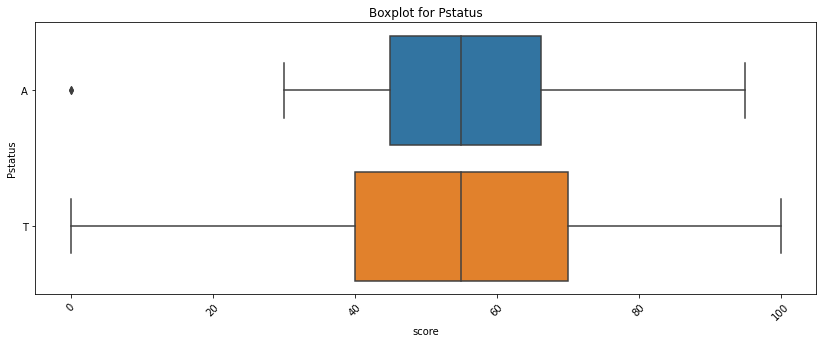

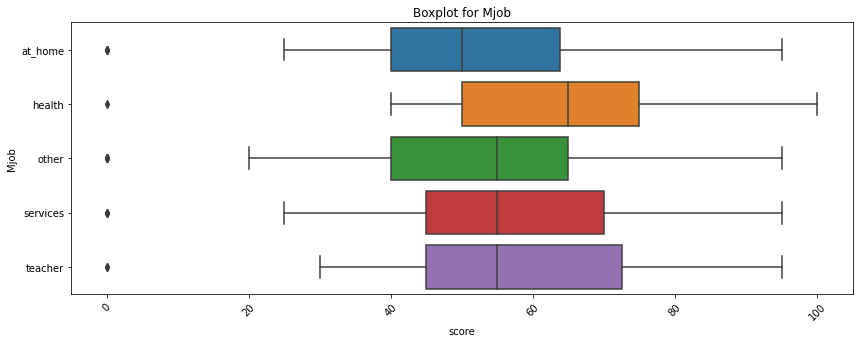

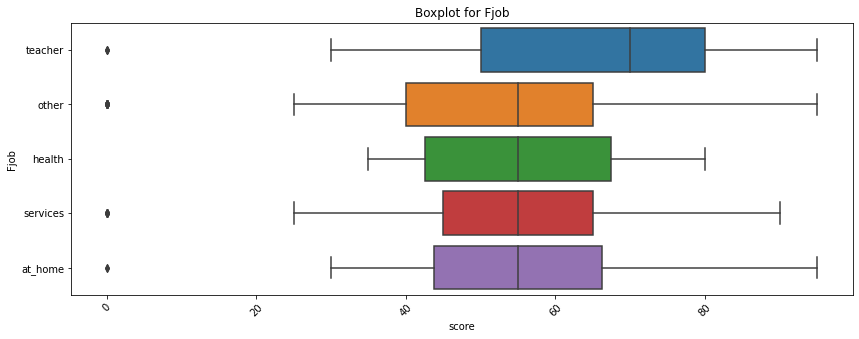

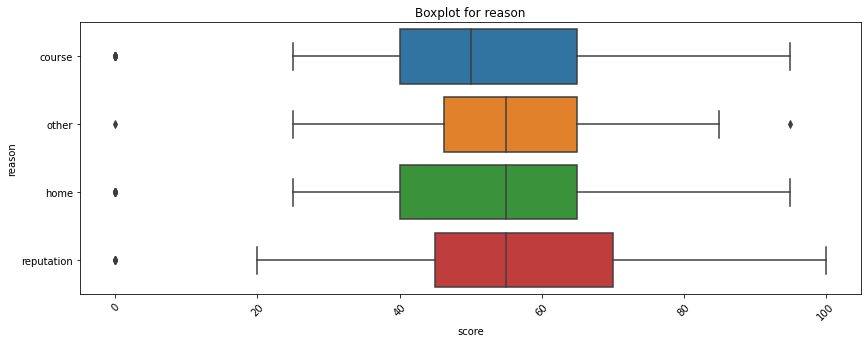

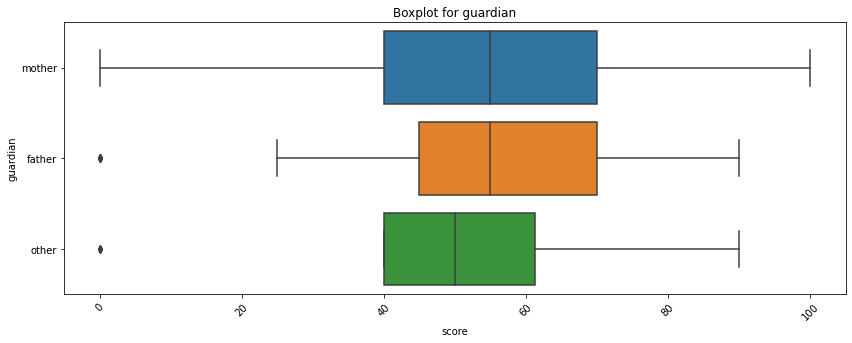

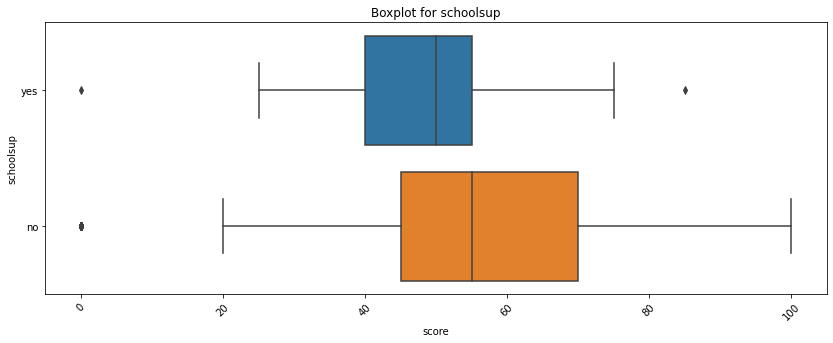

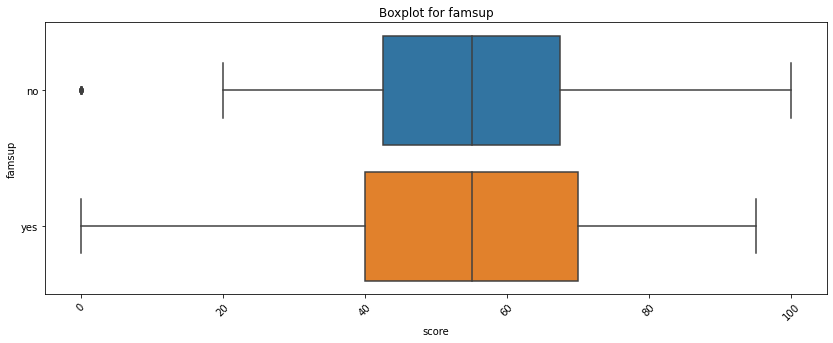

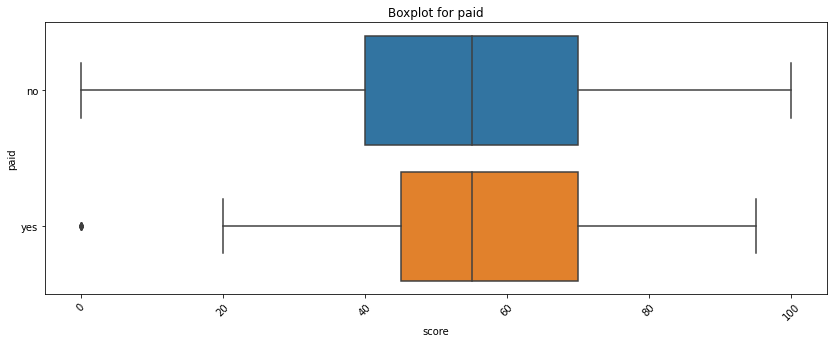

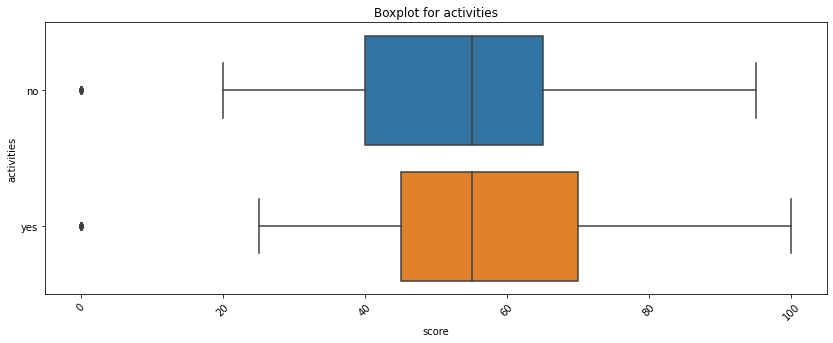

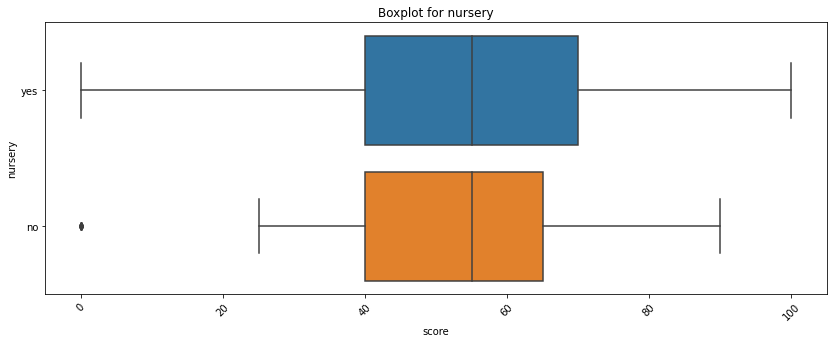

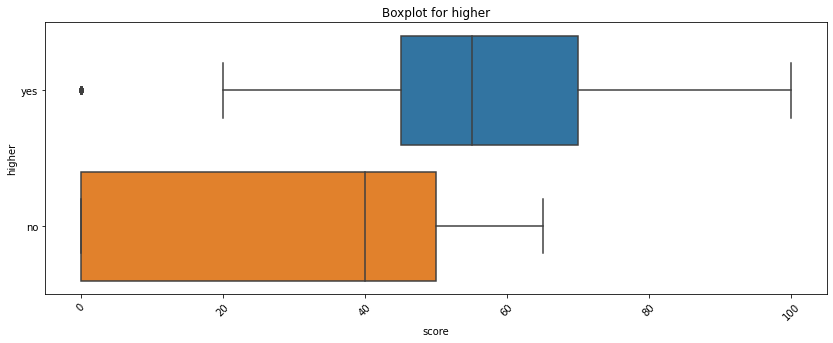

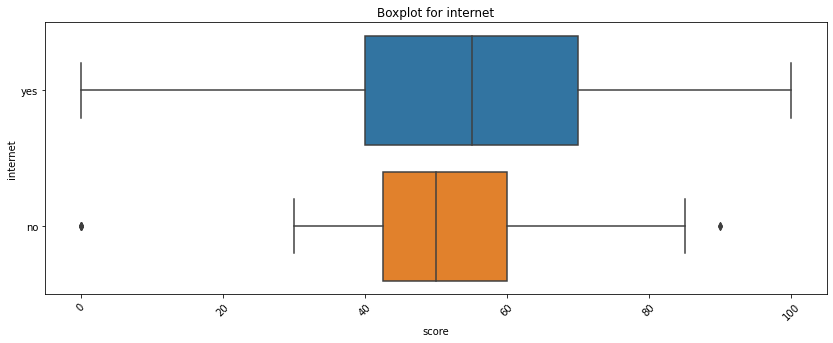

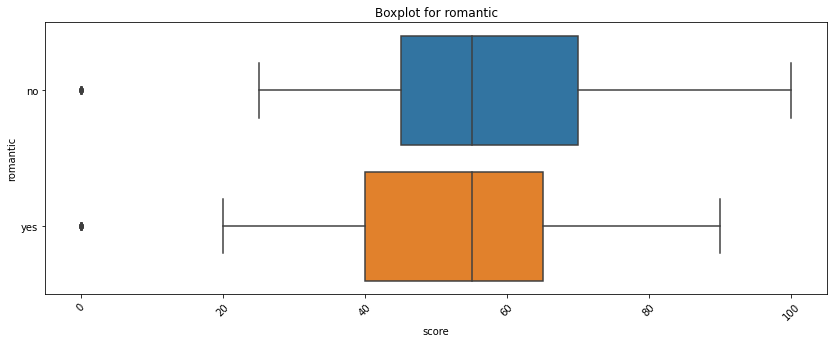

In [48]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 5))
    sns.boxplot(y=column, x='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:5])],
               ax=ax, orient='h')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

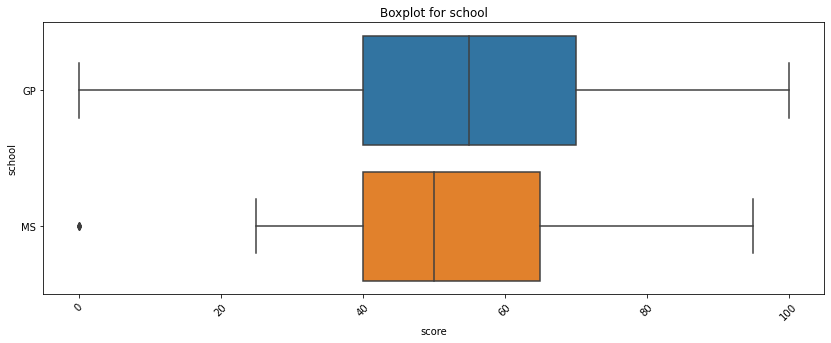

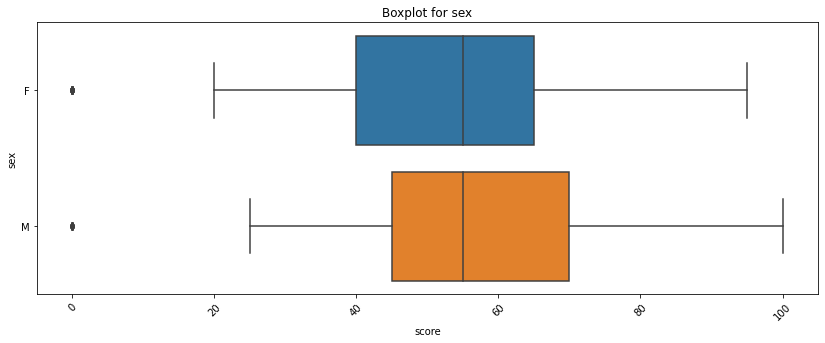

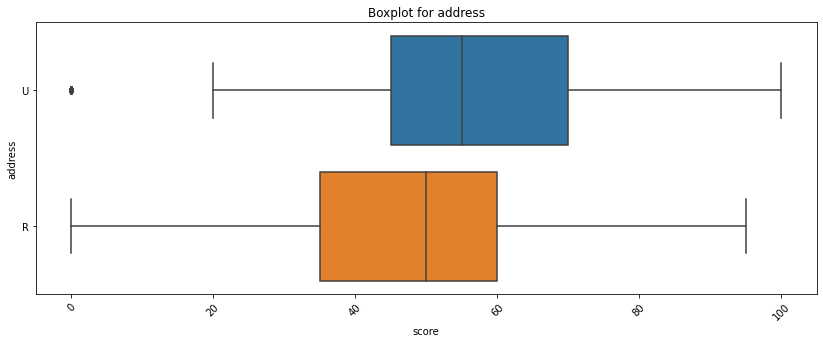

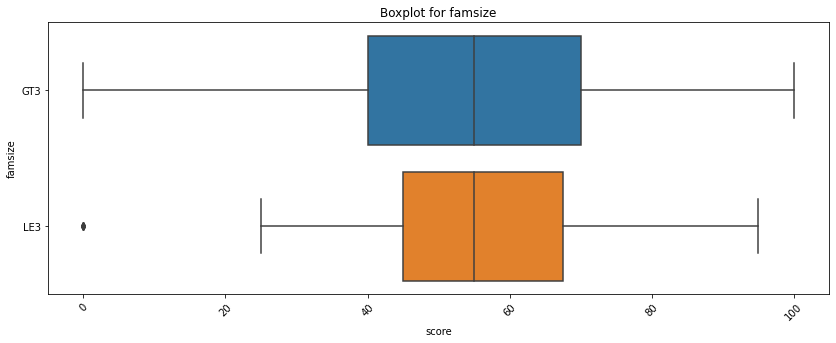

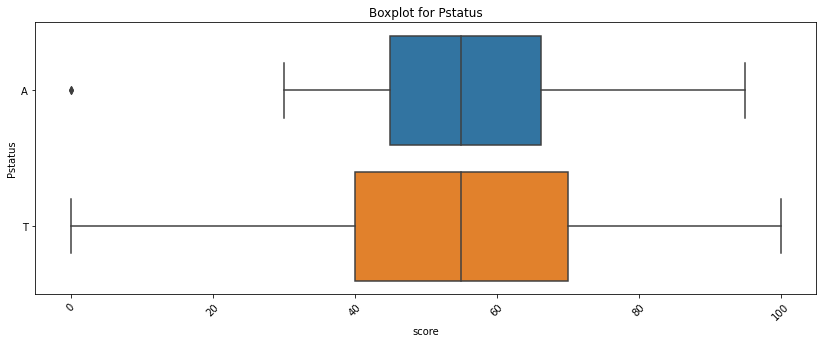

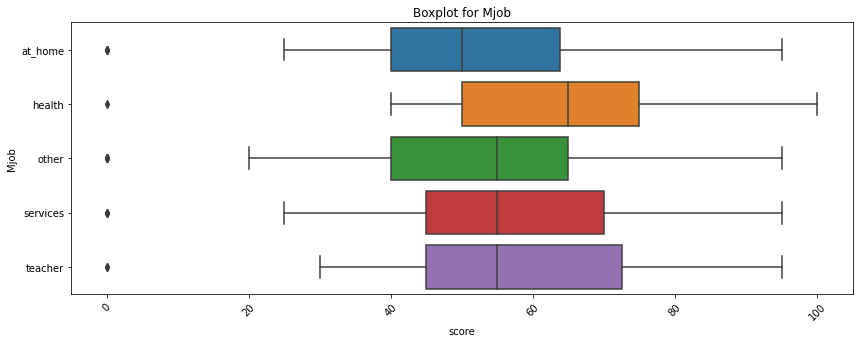

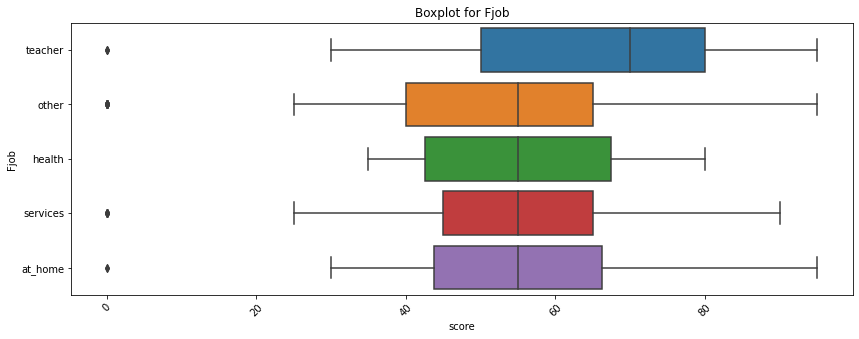

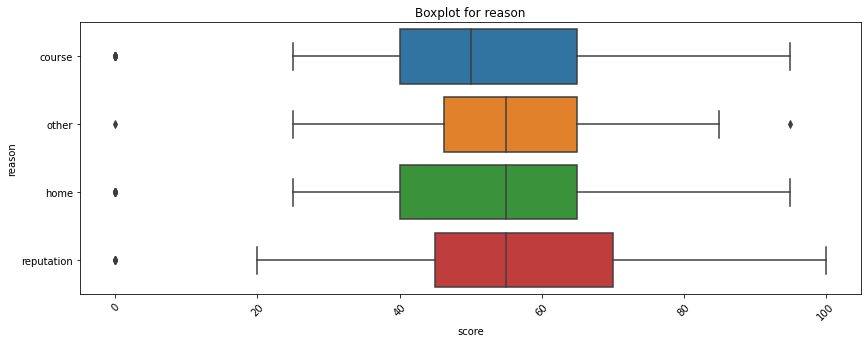

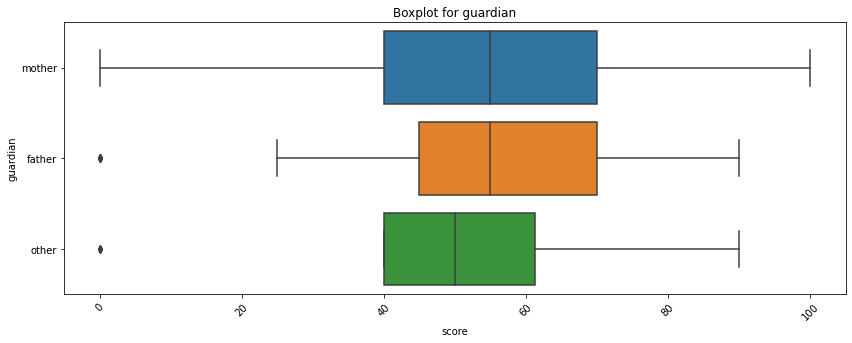

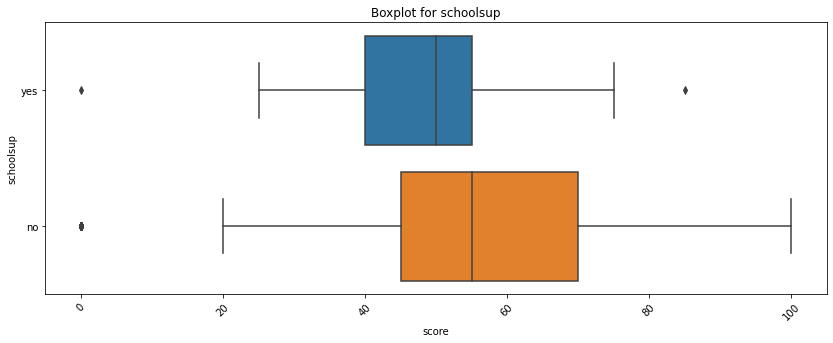

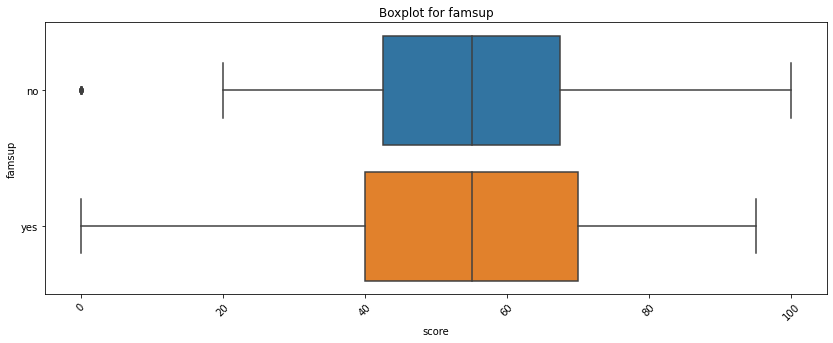

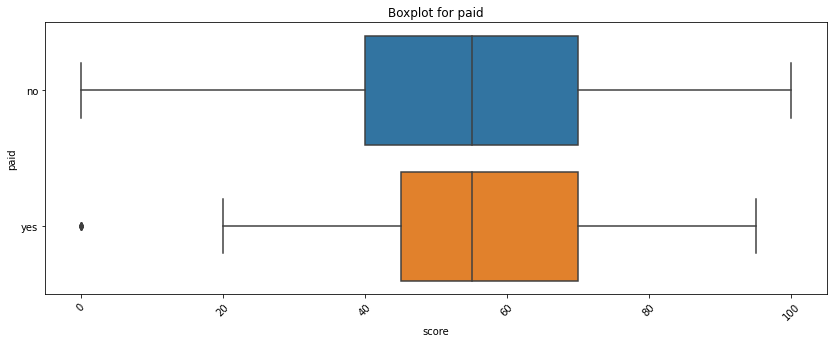

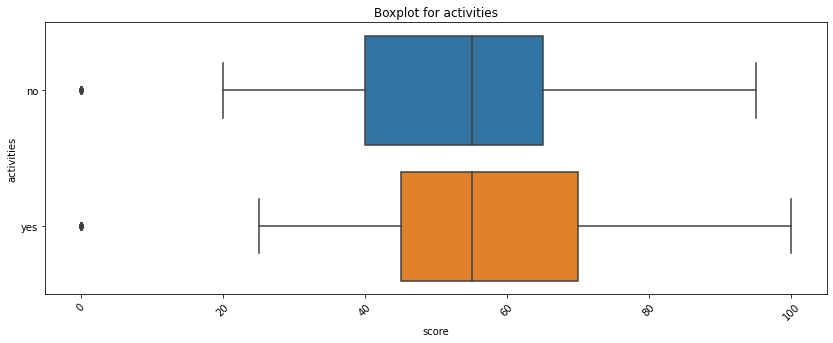

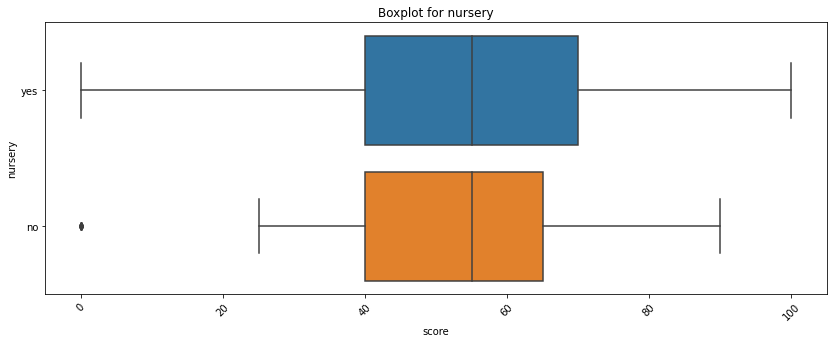

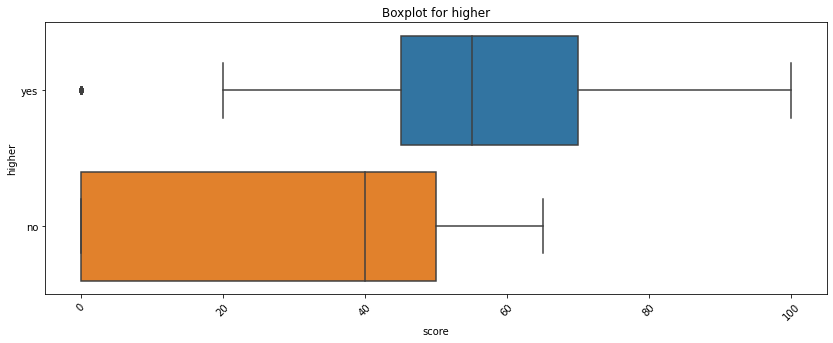

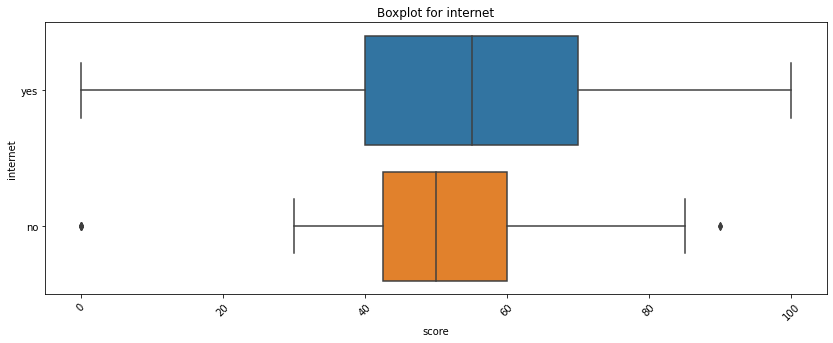

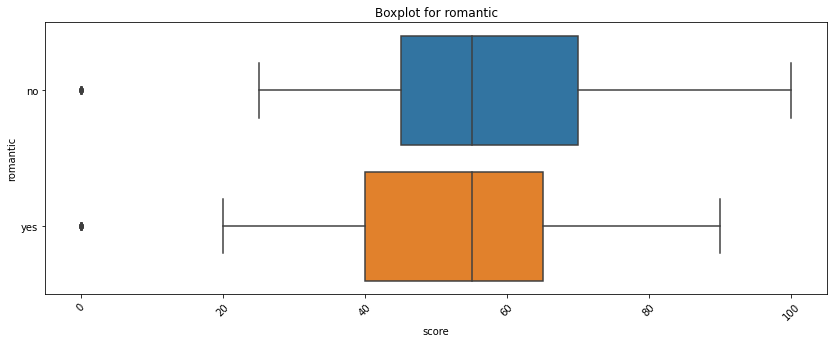

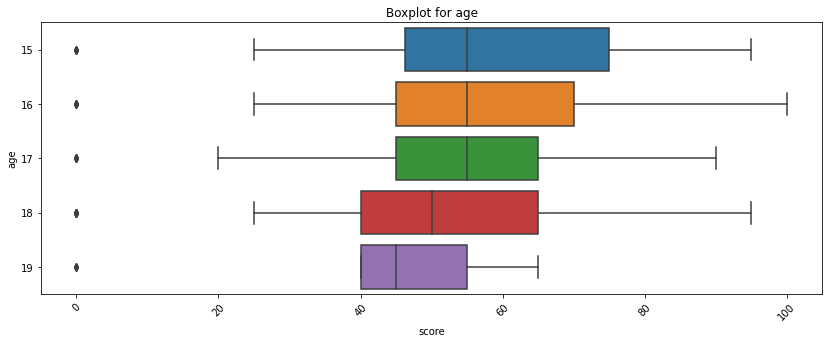

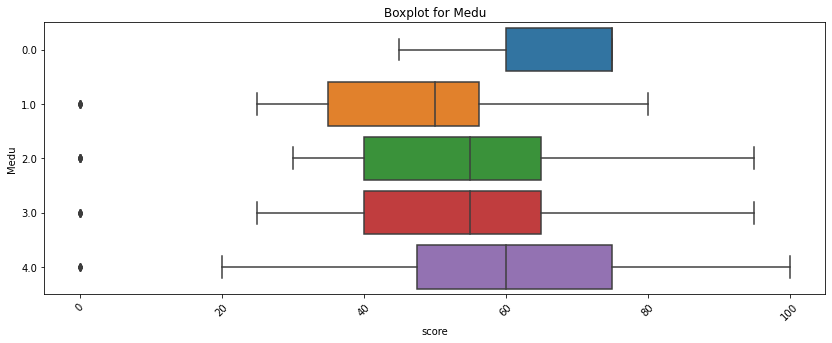

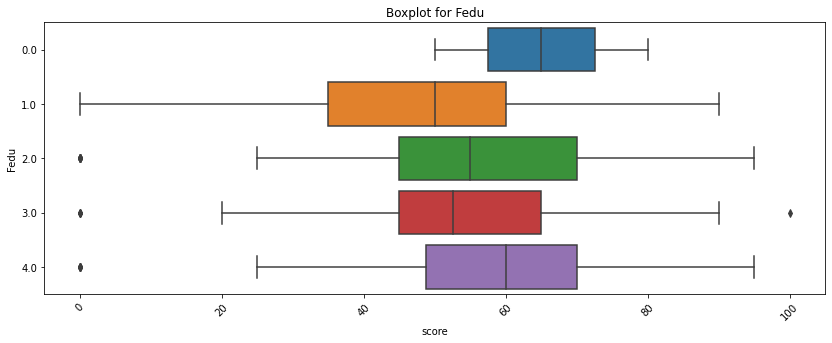

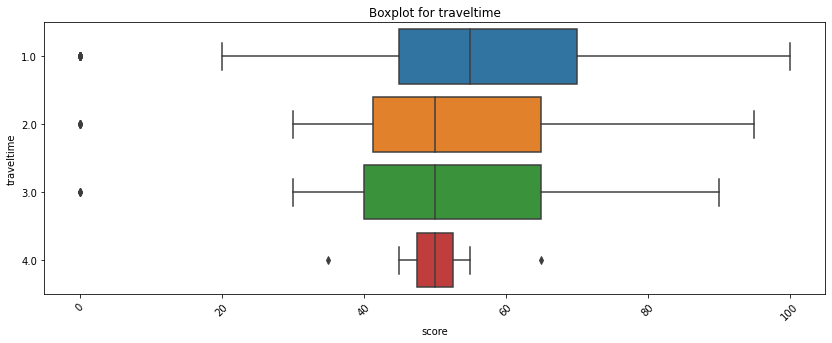

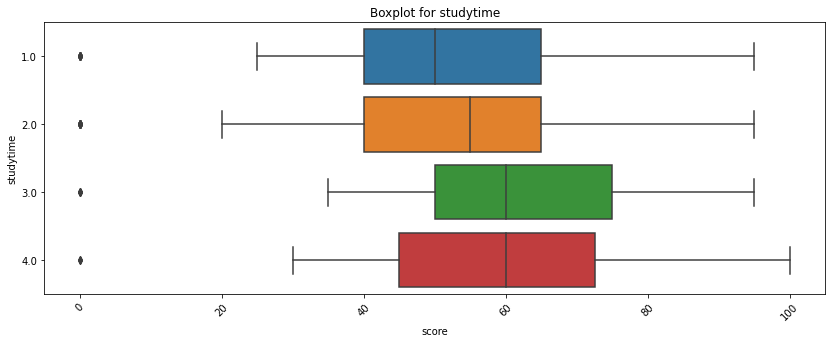

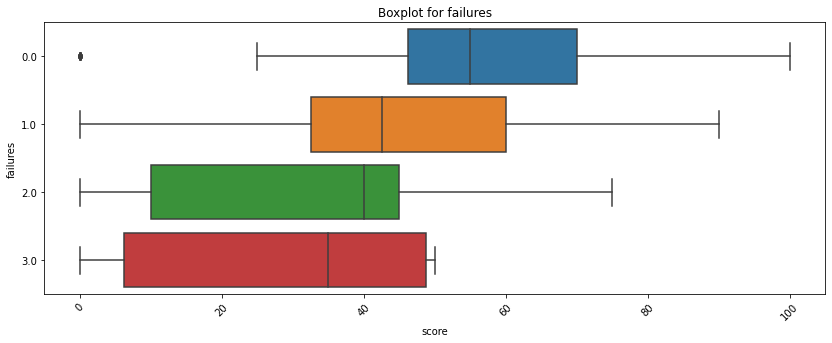

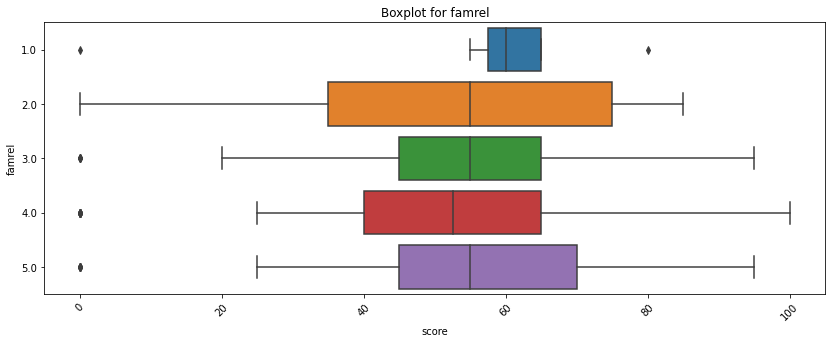

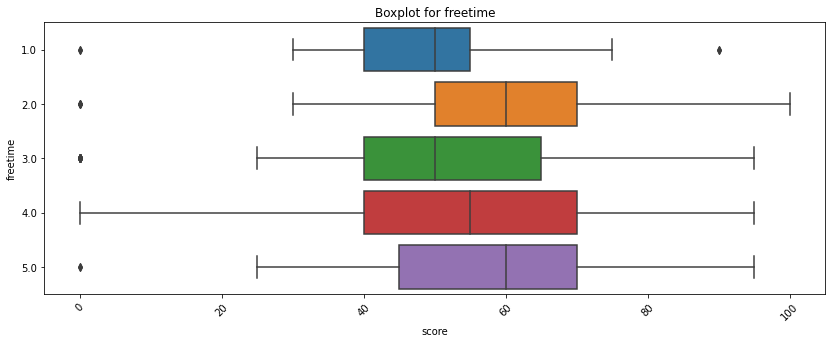

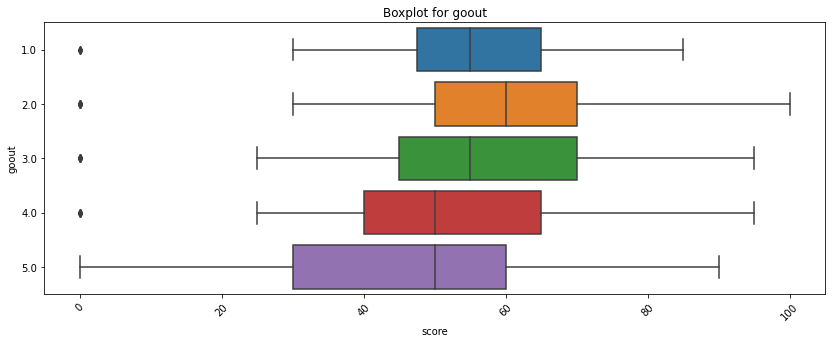

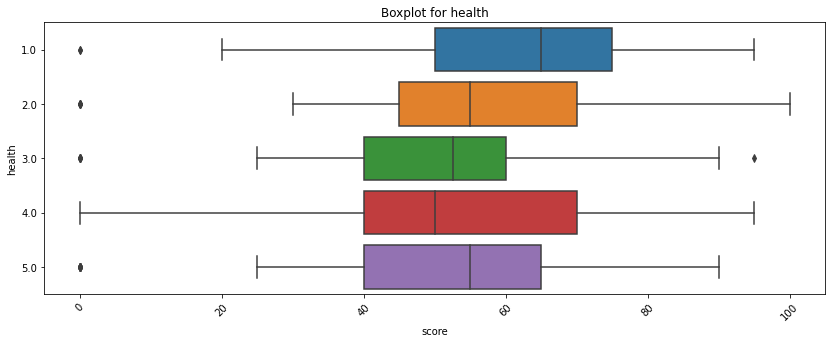

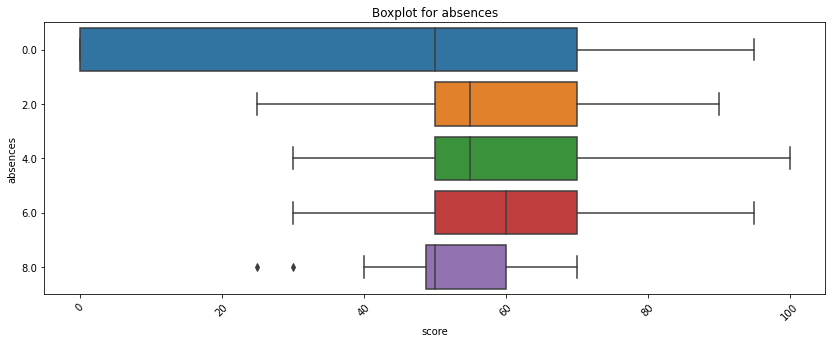

In [50]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 5))
    sns.boxplot(y=column, x='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:5])],
               ax=ax, orient='h')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic','age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

age boxplot
school - GP =16-17 MS=17.2-18 
sex max count stud 16-18 основное колво учащихся 
adress 16-17=U 16-18=R
famsize 16-18 3<=fs=>3
Pstatus 15-17+ A 16-18 T
Mjob 
Fjob 
reason 'home'= 'course' 'reputation' = 16-17.5 
guardian 15-17 father 16-17 mother 18+ other
schoolsup yes 15-16
famsup yes 15.5-16 no 17 median
paid same
activities omni same чем старше тем уверенне нет
nursery same
higher хотят моногие 16-17 
internet same
romantic max_yes in 17-18 maax_no 16-17

score 
school - GP >= MS
sex M >= F median same
adress  U >= R
famsize same
Pstatus same
Mjob health->best corr
Fjob teacher ->>best corr
reason нихудший'course' 'reputation' максимально  , но медиана у всех одинакова
guardian  father = mother  >  other
schoolsup наличие допподдержки ухудшает результат score
famsup median same 
paid same но чуть хуже если нет
activities omni same но чуть лучше paid
nursery same activities
higher сильное влияние
internet same есть положительны е и отрицательные влияния
romantic same но как всегда любовь помеха учебе


Medu — образование матери максимально успешно к 0 и 4
Fedu — образование отца почти как у матери
traveltime — время в пути до школы те кто живет далеко от школ показывают наихудший результат
studytime — время на учёбу помимо школы в неделю лучше влияет от 5 часов в неделю
failures с отрывом - отсуствие и 1 фейл - остальные сдаются и не тянут
famrel — семейные отношения не оказывают чритического влияния но лучше (немного) у кого дружная семья
freetime — свободное время после школы плохо тем у кого совсем нет, но если ессть часок то почти счастлив и успеваемость ок
goout — проведение времени с друзьями так же как freetime
health — текущее состояние здоровья или учеба портит здоровье или хорошо учатся только больные
absences — количество пропущенных занятий мало помогает - кажется не зависит

In [ ]:
stud_numeric.age.value_counts(dropna=False) #как вариант пройтитсь по всем столбцам


In [ ]:
#функция к столбцам, чтобы считались самые частые и уникальные значения

def uniqum(df, col):
    for column in col:
        col_series = pd.Series(df[column].value_counts() > 10)
        col_series = sorted(list(col_series[col_series == True].index))
        print('Column:', column)
        print("More 10 repiting:",
              (stud[column].value_counts(dropna=False) > 10).sum(), '-', col_series)
        print("Uniqums:", stud[column].nunique(), '\n')
#col_num = stud.select_dtypes(include='number').columns
uniqum(stud, col_num)

In [12]:
#со списками теперь можно устроить некоторое преобразование столбцов функцией

def replace_isnon_med(df, col): # функция замены пропусков в стобцах
    med_col = df[col].median(axis=0)# вычисляем медиану столбца
    df[col] = df[col].fillna(med_col)# заполняем пропуски
    return df
replace_isnon_med(stud, numeric_cols)



KeyError: "['studytime, granular'] not in index"

In [ ]:
#кажется погорячился все параметры приводить к медиане не разумно

In [ ]:
#как данные , пока необработанные коррелируют между собой
plt.subplots(figsize=(20,15))
sns.heatmap(stud.corr(),annot = True) #annot = True

In [ ]:
stud.isnull().sum().sort_values(ascending=False)    #что там с пропусками?
#stud.notnull()


In [ ]:
#а еще визуально на все сразу поглядим
cols = stud.columns[:30] # первые 30 колонок? или сколько их там
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
plt.subplots(figsize=(20,15))
colours = ['#000fff', '#fff000'] 
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
display(pd.DataFrame(stud.address.value_counts(dropna=False)))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (stud.address.value_counts()>10).sum())
stud.loc[:, ['address']].info()

In [ ]:
stud.address.value_counts(dropna=False) #(dropna=False) позволяет видеть пустые значения

In [ ]:
stud.famrel.value_counts(dropna=False)

In [ ]:

print(stud['Medu'].nunique())
print(stud['Medu'].unique())
#stud.Medu = stud.Medu.apply(lambda x: None if x.strip() == '' else x)
#stud.Medu.fillna('None')
stud['Medu'].fillna(stud.famrel.median(), inplace=True) #заполнение пропусков значением 
#stud.Medu = stud.Medu.apply(lambda x: stud.Medu.median() if pd.isna(x) else x)
display(pd.DataFrame(stud.famrel.value_counts()))
stud.famrel = stud.famrel.apply(lambda x: 1 if x <= 1 else x) #-1 вероятная ошибка сбора, заменяем на ближайшее валидное значение
stud.famrel = stud.famrel.apply(lambda x: stud.famrel.median() if pd.isna(x) else x) # пропушенные значения заменяем на медиану
stud.famrel
stud.isnull().sum().sort_values()

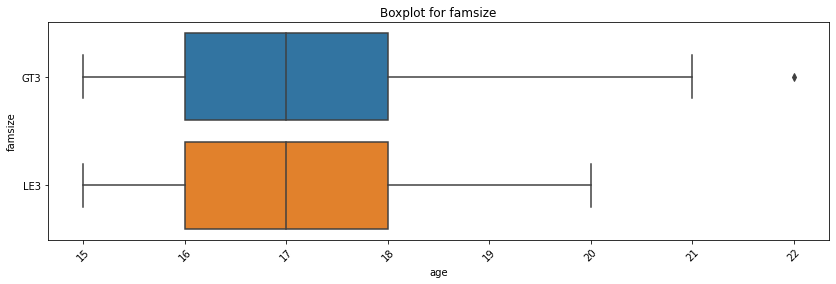

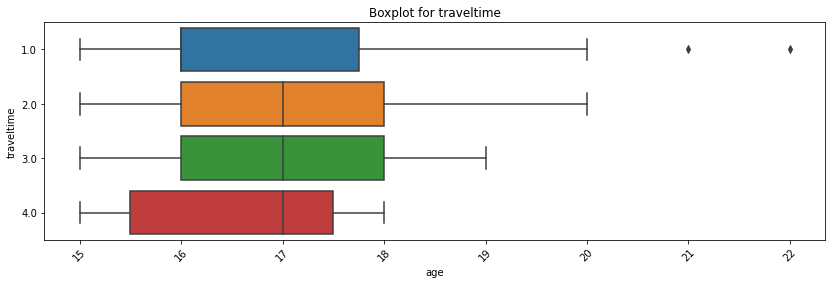

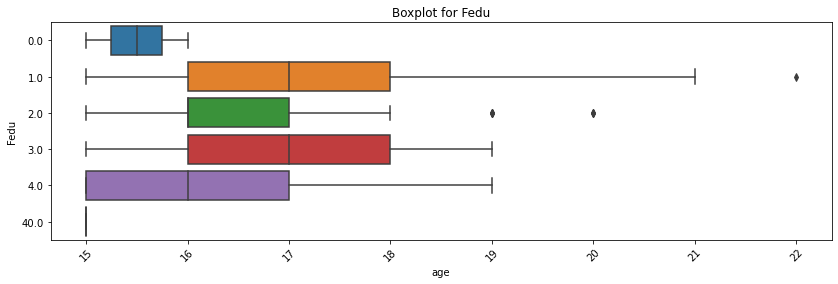

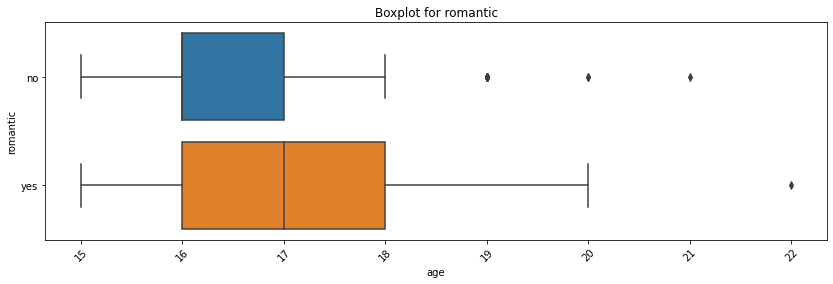

In [30]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(y=column, x='age',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax,
               orient='h')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['famsize', 'traveltime', 'Fedu', 'romantic']:
    get_boxplot(col)

In [ ]:

print(stud['Medu'].nunique())
print(stud['Medu'].unique())


In [ ]:
plt.plot(stud.Medu)
#stud['famsize'].value_counts().hist()

In [ ]:
stud['school'].hist()
stud['school'].describe()

In [ ]:
plt.subplots(figsize=(20,15))
stud['famrel'].value_counts().plot(kind="pie", figsize=(5, 5), fontsize=10)

In [ ]:
#sns.pairplot(stud)
sns.countplot(x='age', data=stud)

In [ ]:
#Использование Seaborn совместно с matplotlib
fig, ax = plt.subplots()
sns.regplot("studytime", "age", data=stud, ax=ax)
ax.set_title("Title")
plt.xlabel('Stud Time')
fig.savefig("filename.png", dpi=200)